In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

SyntaxError: invalid syntax (<ipython-input-5-b4987ba4d452>, line 3)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [18]:
import pandas_datareader.data as web

In [10]:
from datetime import datetime

In [11]:
from __future__ import division

In [34]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [35]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [37]:
for stock in tech_list:
    globals()[stock]=web.DataReader(stock,'yahoo',start,end)

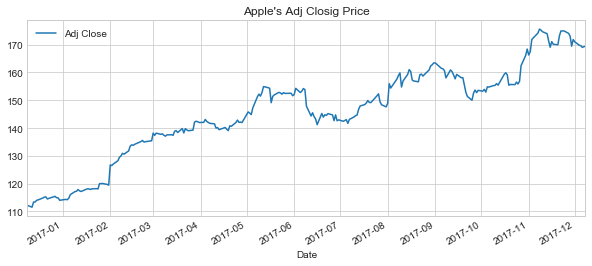

In [44]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4),title="Apple's Adj Closig Price")

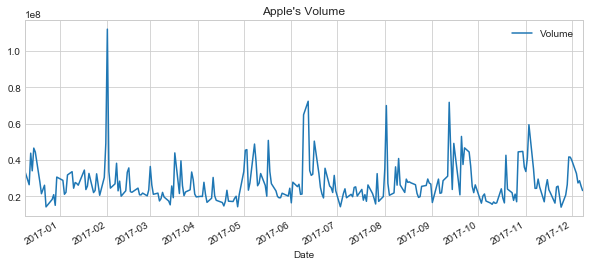

In [46]:
AAPL['Volume'].plot(legend=True,figsize=(10,4),title="Apple's Volume")

In [47]:
ma_day=[10,20,50]
for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


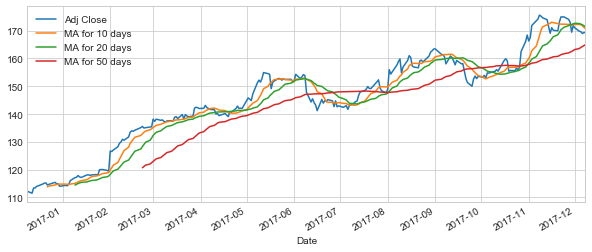

In [49]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(figsize=(10,4))

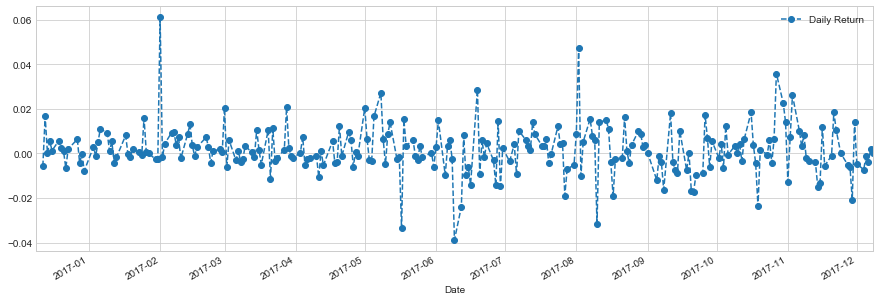

In [59]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,5),legend=True,linestyle='--',marker='o')

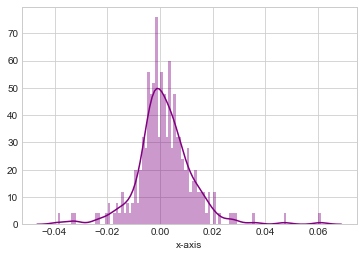

In [65]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple',axlabel='x-axis',label='hist')

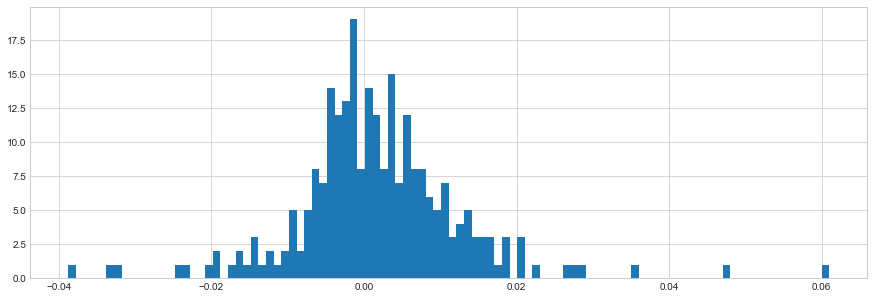

In [68]:
AAPL['Daily Return'].hist(figsize=(15,5),bins=100)

In [70]:
closing_df=web.DataReader(tech_list,'yahoo',start,end)['Adj Close']
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-08,169.369995,1162.000000,1037.050049,84.160004
2017-12-07,169.320007,1159.790039,1030.930054,82.489998
2017-12-06,169.009995,1152.349976,1018.380005,82.779999
2017-12-05,169.639999,1141.569946,1005.150024,81.589996
2017-12-04,169.800003,1133.949951,998.679993,81.080002


In [74]:
tech_rets=closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-08,NaN,NaN,NaN,NaN
2017-12-07,-0.000295,-0.001902,-0.005901,-0.019843
2017-12-06,-0.001831,-0.006415,-0.012174,0.003516
2017-12-05,0.003728,-0.009355,-0.012991,-0.014375
2017-12-04,0.000943,-0.006675,-0.006437,-0.006251


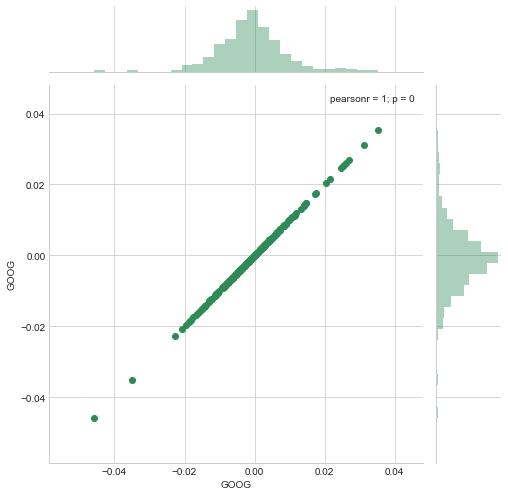

In [78]:
sns.jointplot('GOOG','GOOG',tech_rets,color='seagreen',size=7)

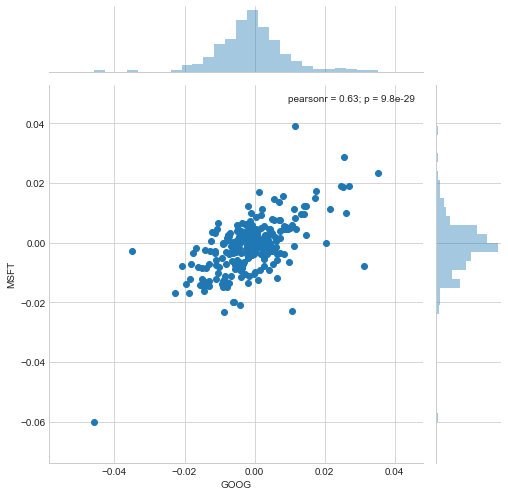

In [80]:
sns.jointplot('GOOG','MSFT',tech_rets,size=7)

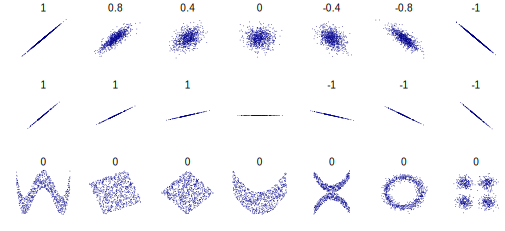

In [82]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

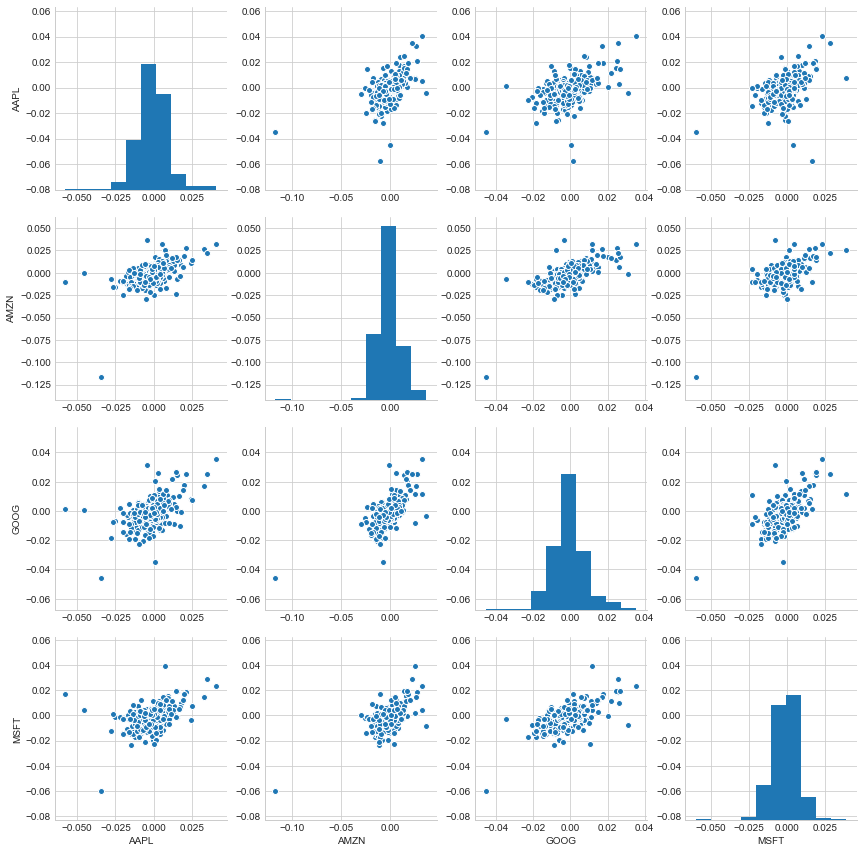

In [87]:
sns.pairplot(tech_rets.dropna(),size=3)

/Users/mithleshpatel/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


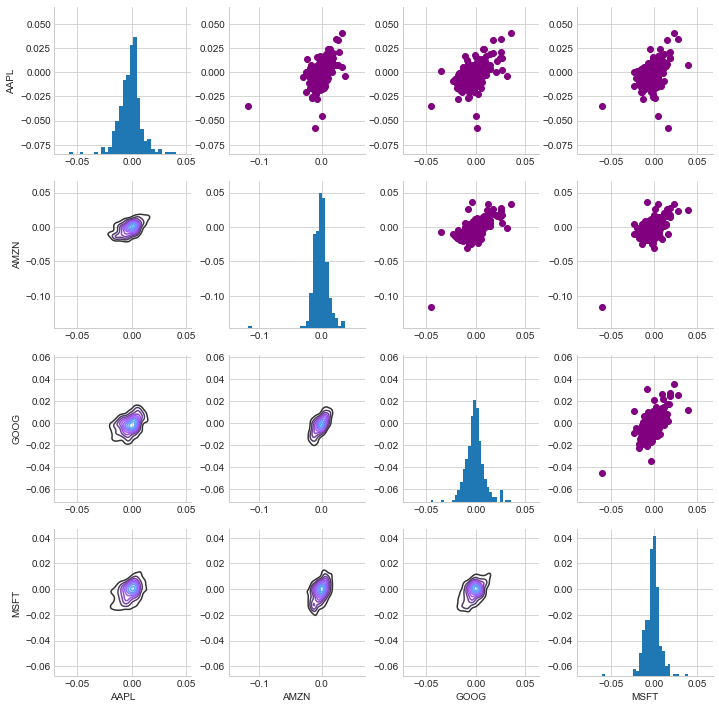

In [88]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

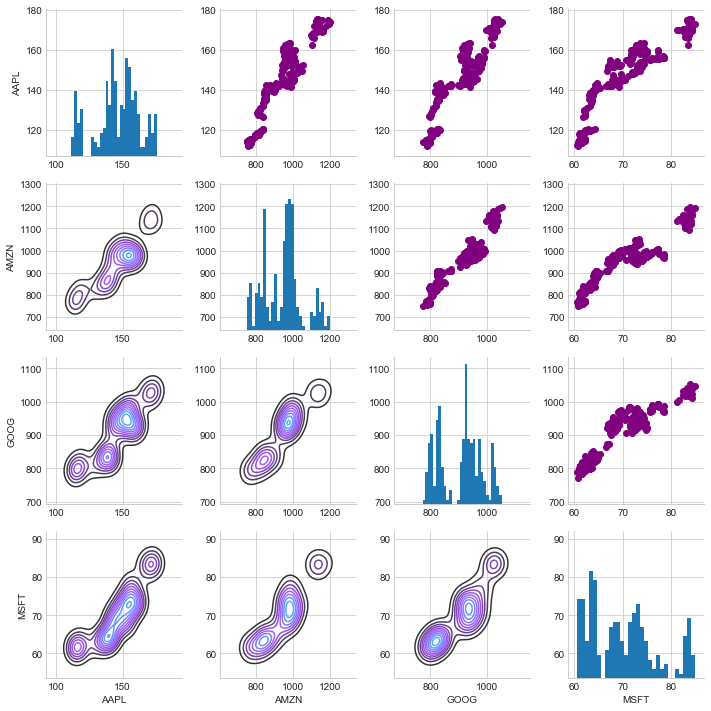

In [89]:
returns_fig=sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

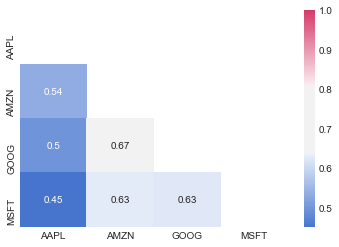

In [94]:
corr=tech_rets.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

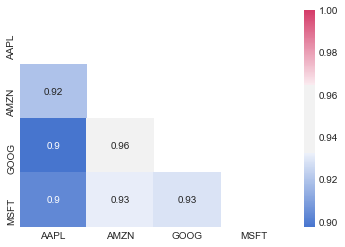

In [95]:
corr=closing_df.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True),annot=True,mask=mask)

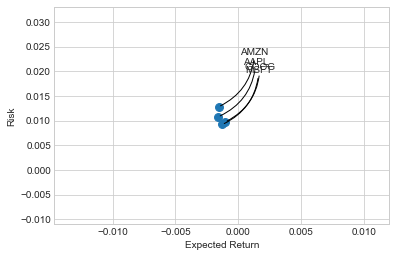

In [99]:
rets=tech_rets.dropna()
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    
    plt.annotate(
    label,
    xy=(x,y),xytext=(50,50),
    textcoords='offset points',ha='right',va='bottom',
    arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))